# Proyecto 5

In [1]:
## Importamos librerías y archivo de funciones

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions as f
import statsmodels.api as sm
from scipy.stats.contingency import association


##  DF  PERFILES (df_final_demo)

In [3]:
df = pd.read_csv('df_final_demo.txt') 

#### Exploración

In [4]:
## Exploramos los datos 
f.explorar_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
None
Primeras filas
   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U

In [5]:
## Comprobamos la cantidad de nulos y cuáles son.
df.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [6]:
nulos=f.ver_nulos(df)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
## Comprobamos la cantidad de duplicados
duplicados = df.duplicated().sum()
duplicados

np.int64(0)

In [8]:
## A raíz de la exploración, comenzamos la limpieza de nulos.

#### Limpieza 

Eliminaremos las columnas que no aportan información relevante para el análisis, ya que solo tienen valores nulos y el nombre del cliente

In [9]:
#Eliminamos nulos sin información relevante, pero nos quedamos con el client_id 4666211	para imputarle un valor. 
df_limpio = df.dropna(thresh=5)

In [10]:
## Comprobamos que funciona
df_limpio.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            1
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [11]:
## Imputamos valor medio a esa edad 
valor = df_limpio['clnt_age'].mean()
df_limpio= f.completar_nulos(df_limpio,'clnt_age',valor)

/Users/maria/Desktop/ironhack/proyecto-5-/functions.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(valor)


In [12]:
## Comprobamos 
df_limpio.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [13]:
## Hacemos limpieza de datos final (incluye unificación de minus y espacios)
df_final = f.limpiar_dataset(df_limpio)
df_final

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


### Unificación

In [14]:
## Para un uso más cómodo del dataset, unificamos los nombres de las columnas.
df_perfiles = df_final.rename(columns={
    'clnt_tenure_yr': 'años_fidelizacion',
    'clnt_tenure_mnth':'meses_fidelizacion',
    'clnt_age': 'edad',
    'gendr': 'genero',
    'num_accts' : 'cantidad_cuentas',
    'bal' : 'saldo_total_distribuido',
    'calls_6_mnth': 'llamadas_ultimos_6meses',
    'logons_6_mnth': 'log_in_ultimos_6meses'
})

In [15]:
## Comprobamos los cambios 
df_perfiles.head(3)

,client_id,años_fidelizacion,meses_fidelizacion,edad,genero,cantidad_cuentas,saldo_total_distribuido,llamadas_ultimos_6meses,log_in_ultimos_6meses
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0


### Respuestas

¿Quiénes son los principales clientes que utilizan este proceso en línea? ¿Los clientes principales son más jóvenes o mayores, nuevos o antiguos?
A continuación, realice un análisis del comportamiento del cliente para responder cualquier pregunta adicional relevante que considere importante

In [16]:
## 1 - ¿Quiénes son los principales clientes que utilizan este proceso en línea?
perfil_uso = df_perfiles.groupby('genero').agg({
    'años_fidelizacion': 'median',
    'log_in_ultimos_6meses': 'median',
    'edad': 'median',
    'client_id': 'count'
}).rename(columns={'client_id': 'total_clientes'})

In [17]:
perfil_uso

,años_fidelizacion,log_in_ultimos_6meses,edad,total_clientes
genero,,,,
F,14.0,5.0,51.0,22746
M,14.0,6.0,49.5,23724
U,6.0,5.0,39.0,24122
X,9.0,5.0,40.0,3


In [18]:
## Depende del criterio, dependiendo del volumen de clientes o la lealtad de clientes. 
# -- En volumen de clientes, el grupo más grande es el Género U (Desconocido) con 24122 clientes
# -- El género masculino, es el que más utiliza el proceso en línea (tiene más log-ins)
# -- Por lealtad, el género femenino y masculino son los grupos de mayor fidelización, con 14 años de media. 

In [19]:
## 2 - ¿Los clientes principales son más jóvenes o mayores, nuevos o antiguos?

In [20]:
## Para un muestreo representativo, los clientes principales son los grupos U, M y F (99.9% del total)
principales = df_perfiles[df_perfiles['genero'] != 'X']
respuesta = principales[['edad', 'años_fidelizacion']].mean()

In [21]:
respuesta

edad                 46.442542
años_fidelizacion    12.053051
dtype: float64

In [22]:
## La tendencia indica que los clientes principales son de edad media (46-47 años) y con una fidelización media de 14 años.

In [23]:
## 3 - Veamos como se comporta la variable edad
f.categorico(df_perfiles, 'edad')

edad
58.50000    859
55.50000    830
29.50000    829
28.50000    827
57.50000    826
           ... 
14.00000      2
46.44224      1
94.50000      1
95.50000      1
13.50000      1
Name: count, Length: 166, dtype: int64
[60.5        58.         32.         49.         33.         30.5
 58.5        57.5        67.5        54.5        34.5        51.5
 62.5        36.         74.         32.5        31.         25.5
 42.5        42.         30.         55.         38.         68.5
 52.5        54.         63.         48.         66.5        68.
 65.         51.         46.         63.5        23.         26.5
 56.5        76.5        27.5        39.5        25.         27.
 60.         66.         39.         56.         40.         52.
 31.5        43.5        35.         19.         64.5        64.
 22.5        33.5        36.5        61.         40.5        72.
 44.5        28.5        59.5        45.         18.         78.
 50.5        29.         37.5        57.         70.        

### Análisis de comportamiento del cliente

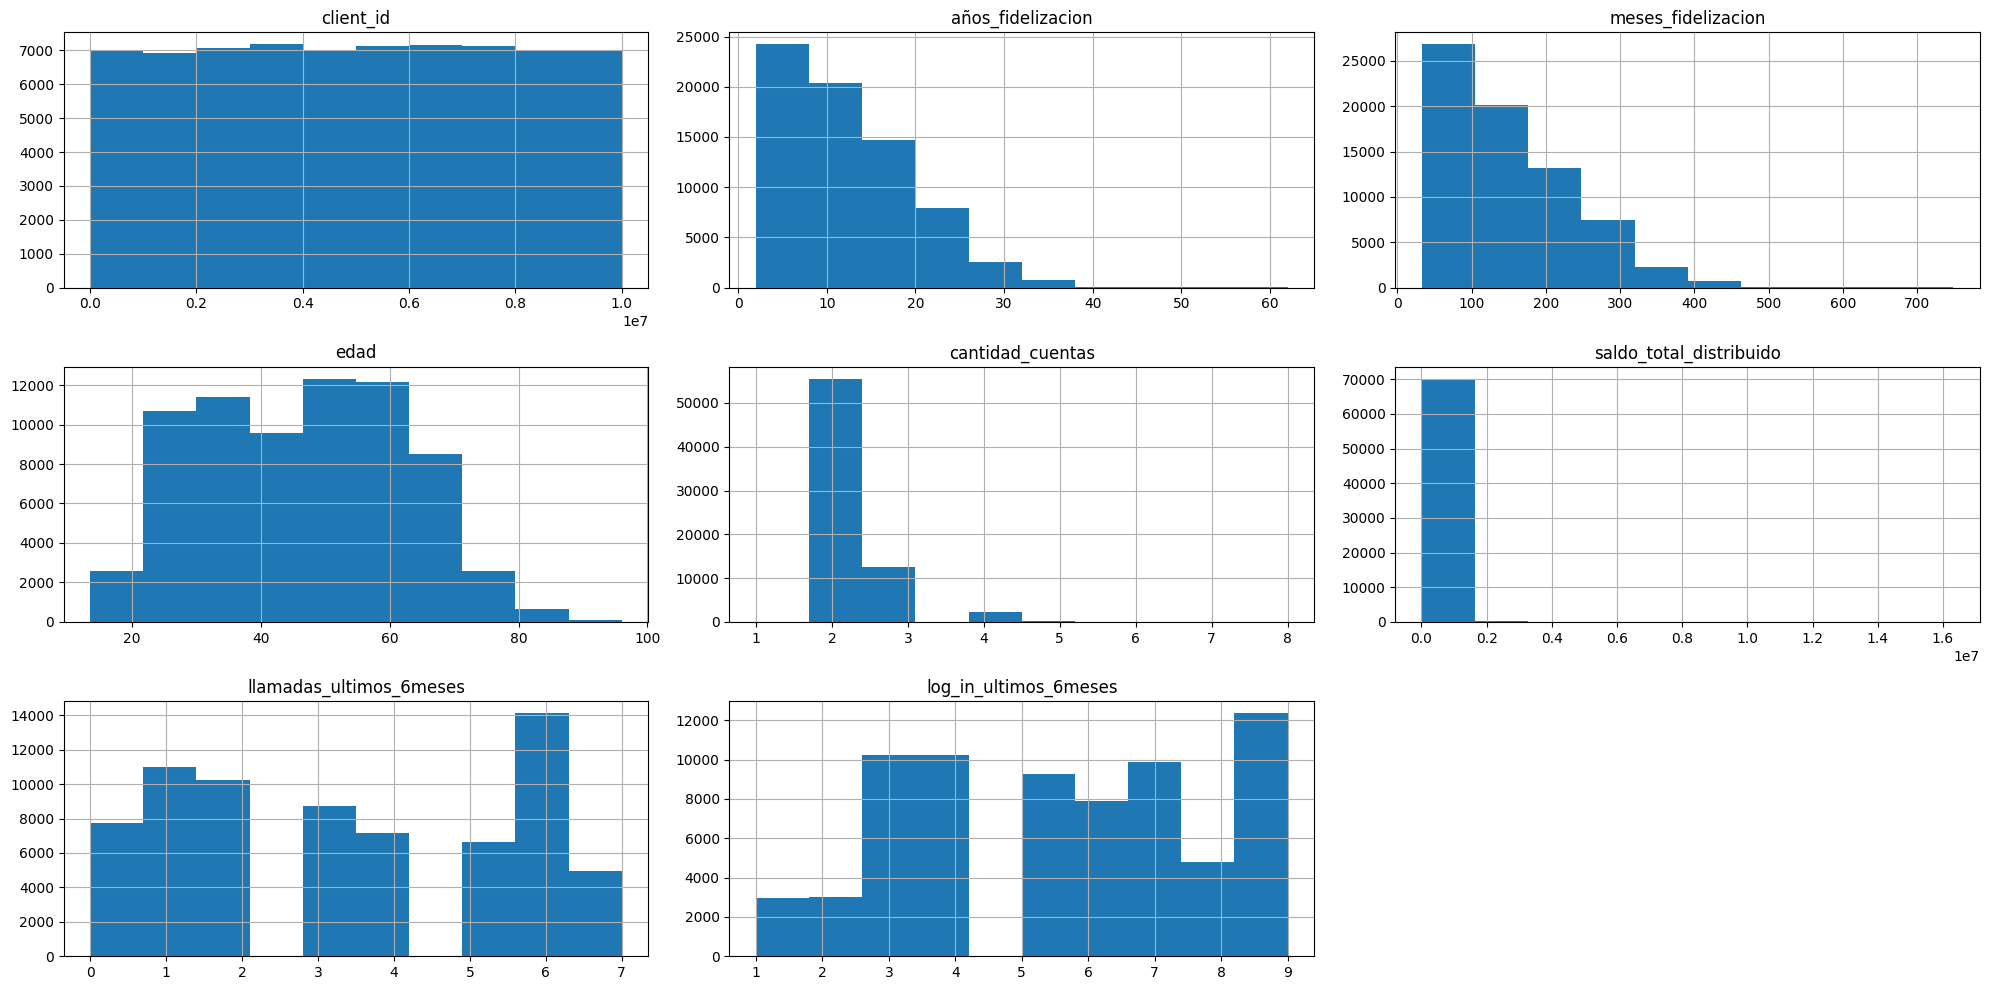

In [24]:
## Hacemos histogramas según series para obtener ideas visuales de nuestra tabla
df_perfiles.hist(figsize=(20,10))
plt.tight_layout()
plt.show()

#### ¿Cuántos clientes tenemos de cada grupo?

* Construimos la tabla de frecuencias por grupos de edades agregando una nueva columna con los rangos de edad

In [25]:
df_perfiles_edad = f.rango_edad(df_perfiles, 'edad')

In [26]:
df_perfiles_edad

,client_id,años_fidelizacion,meses_fidelizacion,edad,genero,cantidad_cuentas,saldo_total_distribuido,llamadas_ultimos_6meses,log_in_ultimos_6meses,grupo_edad
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Adultos maduros(51-65)
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Adultos maduros(51-65)
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Jóvenes(19-35)
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Adultos(36-50)
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Jóvenes(19-35)
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,Adultos(36-50)
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,Jóvenes(19-35)
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,Adultos maduros(51-65)
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,Adultos mayores(66+)


* Hacemos visualizaciones según variable: ¿Cuántos clientes hay de cada grupo de edad?

In [27]:
df_perfiles_edad['grupo_edad'].value_counts()


grupo_edad
Adultos maduros(51-65)    22345
Jóvenes(19-35)            20587
Adultos(36-50)            18430
Adultos mayores(66+)       8705
Niños(0-18)                 528
Name: count, dtype: int64

In [28]:
orden_especifico = [
    'Niños(0-18)', 
    'Jóvenes(19-35)', 
    'Adultos(36-50)', 
    'Adultos maduros(51-65)', 
    'Adultos mayores(66+)'
]

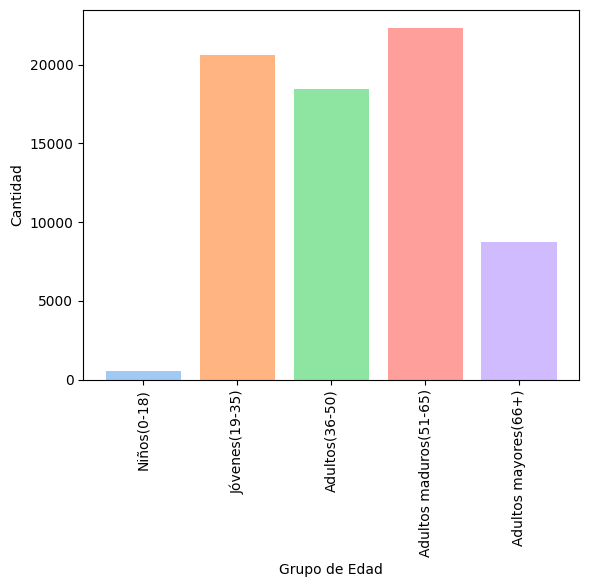

In [29]:
conteo = df_perfiles_edad['grupo_edad'].value_counts().reindex(orden_especifico)
plt.bar(conteo.index, conteo.values, color=sns.color_palette('pastel'))
plt.figsize=(10,6)
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)

plt.show()


plt.show()


* ¿Quiénes son los clientes con mayor saldo total distribuido?

In [30]:
clientes_mayor_saldo = df_perfiles.groupby('genero')[['saldo_total_distribuido', 'log_in_ultimos_6meses']].mean()

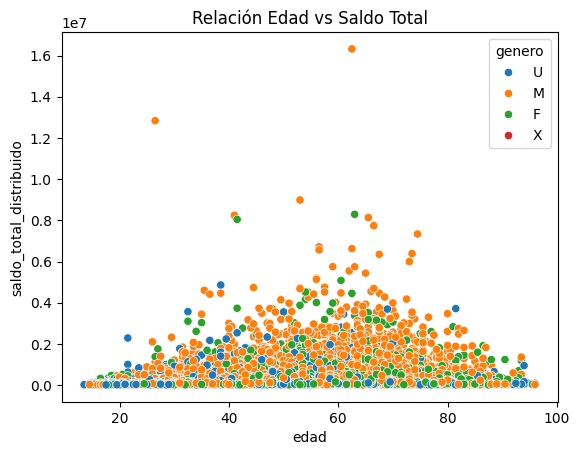

In [31]:
sns.scatterplot(data=df_perfiles, x='edad', y='saldo_total_distribuido', hue='genero')
plt.title('Relación Edad vs Saldo Total')
plt.show()

* Correlaciones entre variables

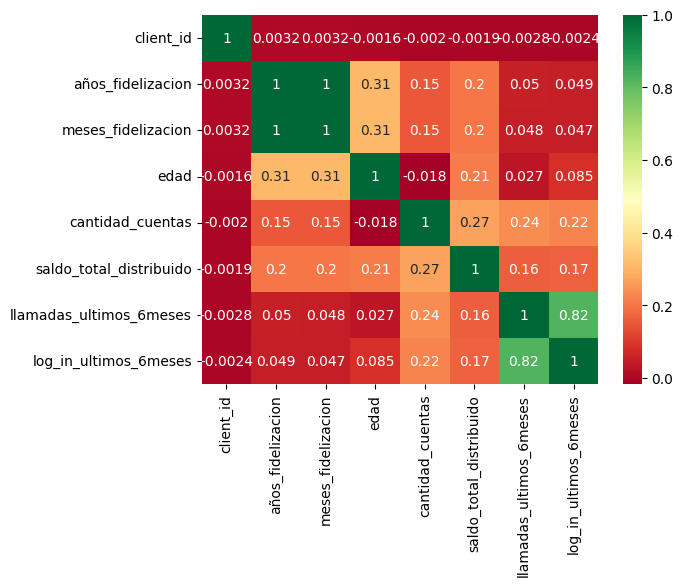

In [32]:
corr = df_perfiles.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

# DF EXPERIMENTOS  (df_final_experiment_clients)

In [33]:
df_experimentos = pd.read_csv('df_final_experiment_clients.txt')

#### Exploración

In [34]:
df_experimentos.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [35]:
f.explorar_df(df_experimentos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None
Primeras filas
   client_id Variation
0    9988021      Test
1    8320017      Test
2    4033851   Control
3    1982004      Test
4    9294070   Control
Describe()
             count unique   top   freq            mean             std    min  \
client_id  70609.0    NaN   NaN    NaN  5004991.876574  2877277.629755  169.0   
Variation    50500      2  Test  26968             NaN             NaN    NaN   

                 25%        50%        75%        max  
client_id  2519329.0  5016978.0  7483085.0  9999839.0  
Variation        NaN        NaN        NaN        NaN  
Nulos
Variation    20109
dtype: int64
Duplicados
0
Tamaño
Filas: 70609 | Columnas: 2


### Limpieza

In [36]:
## No tiene datos duplicados pero si nulos. Veamos los nulos:
nulos_exp = f.ver_nulos(df_experimentos)

,client_id,Variation
50500,5459747,NaN
50501,8031000,NaN
50502,1847030,NaN
50503,9713157,NaN
50504,7775828,NaN
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [37]:
## Unificamos 
df_experimentos = df_experimentos.rename(columns={
    'Variation': 'tipo'
})

In [38]:
df_experimentos

,client_id,tipo
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [39]:
## Decidimos unir este dataset con los otros dos datasets para obtener un DF final y limpiar nulos desde ahí. 

#  DF HUELLAS (df_final_we_data 1 y 2)

In [40]:
df_huellas1 = pd.read_csv('df_final_web_data_pt_1.txt') 

In [41]:
df_huellas2 = pd.read_csv('df_final_web_data_pt_2.txt')

Observamos la estructura de los dataset

In [42]:
df_huellas1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [43]:
df_huellas2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


#### Exploración

In [44]:
f.explorar_df(df_huellas1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB
None
Primeras filas
   client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
3    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
4    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   

             date_time  
0  201

In [45]:
f.explorar_df(df_huellas2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB
None
Primeras filas
   client_id             visitor_id                      visit_id  \
0     763412  601952081_10457207388  397475557_40440946728_419634   
1    6019349  442094451_91531546617  154620534_35331068705_522317   
2    6019349  442094451_91531546617  154620534_35331068705_522317   
3    6019349  442094451_91531546617  154620534_35331068705_522317   
4    6019349  442094451_91531546617  154620534_35331068705_522317   

  process_step            date_time  
0      confirm  2017-06-06 08:56:00  
1      confirm  2017-06-01 

In [46]:
## Comprobamos la cantidad de duplicados
df_huellas1.duplicated().sum()

np.int64(2095)

In [47]:
duplicados=f.ver_duplicados(df_huellas1)

,client_id,visitor_id,visit_id,process_step,date_time
365,9358626,148475529_63668223960,223297395_36250329195_832161,start,2017-04-28 12:27:28
368,5376894,622509328_44408201172,688984457_43441834354_912755,start,2017-04-28 14:20:01
383,438567,923318467_50708963627,330543236_29863358529_771432,start,2017-04-28 02:52:29
785,1423857,716830992_81930238382,568819166_80596727019_75889,confirm,2017-04-10 22:44:58
1816,372523,730241475_25771921122,25331354_74479847014_854987,start,2017-04-27 10:51:26
...,...,...,...,...,...
342621,1853345,831456815_77348510380,596026060_87178689141_910423,step_3,2017-04-13 19:39:24
342677,1251269,791822615_78146852845,763845944_55757914723_70888,start,2017-04-28 10:20:33
342679,1251269,791822615_78146852845,763845944_55757914723_70888,start,2017-04-28 10:18:20
342685,8350388,304440669_31040182888,143359398_96671536668_299057,start,2017-04-28 12:44:21


In [48]:
df_huellas2.duplicated().sum()

np.int64(8669)

In [49]:
duplicados2=f.ver_duplicados(df_huellas2)

,client_id,visitor_id,visit_id,process_step,date_time
125,3751049,937925261_74821699083,628817270_45049432060_475841,start,2017-05-15 23:09:44
143,9912156,746623513_52101087617,780044921_57678038107_984942,start,2017-05-03 14:09:52
326,5786602,893139880_61416949586,747153834_69434320996_858907,start,2017-05-10 01:49:09
328,5786602,893139880_61416949586,747153834_69434320996_858907,start,2017-05-10 01:48:45
375,5786602,893139880_61416949586,119968876_5423296886_390511,start,2017-06-08 02:14:09
...,...,...,...,...,...
412120,1672289,658797407_91003097342,430110748_90347503221_597628,start,2017-05-01 19:28:53
412163,4408245,14058946_73585431797,994148957_84373994761_991865,start,2017-06-06 09:17:23
412165,4408245,14058946_73585431797,994148957_84373994761_991865,start,2017-06-06 09:09:44
412167,4408245,14058946_73585431797,994148957_84373994761_991865,start,2017-06-06 08:51:16


#### Gestión de duplicados

In [50]:
## Decidimos unir los dos datasets y luego eliminar los duplicados. 
df_union = pd.concat([df_huellas1, df_huellas2], axis=0, ignore_index=True)

In [51]:
df_union.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [52]:
f.explorar_df(df_union)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB
None
Primeras filas
   client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
3    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
4    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   

             date_time  
0  201

In [53]:
df_union.duplicated().sum()

np.int64(10764)

In [54]:
duplicados = f.ver_duplicados(df_union)

,client_id,visitor_id,visit_id,process_step,date_time
365,9358626,148475529_63668223960,223297395_36250329195_832161,start,2017-04-28 12:27:28
368,5376894,622509328_44408201172,688984457_43441834354_912755,start,2017-04-28 14:20:01
383,438567,923318467_50708963627,330543236_29863358529_771432,start,2017-04-28 02:52:29
785,1423857,716830992_81930238382,568819166_80596727019_75889,confirm,2017-04-10 22:44:58
1816,372523,730241475_25771921122,25331354_74479847014_854987,start,2017-04-27 10:51:26
...,...,...,...,...,...
755261,1672289,658797407_91003097342,430110748_90347503221_597628,start,2017-05-01 19:28:53
755304,4408245,14058946_73585431797,994148957_84373994761_991865,start,2017-06-06 09:17:23
755306,4408245,14058946_73585431797,994148957_84373994761_991865,start,2017-06-06 09:09:44
755308,4408245,14058946_73585431797,994148957_84373994761_991865,start,2017-06-06 08:51:16


In [55]:
## Nos damos cuenta de que quizá hay duplicados porque la fecha es la misma pero la hora sí es diferente, por eso, decidimos aplicar una función que nos haga otra columna con esta hora. 
f.separa_fecha_hora(df_union, 'date_time')

,client_id,visitor_id,visit_id,process_step,date_time,fecha,hora
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04
...,...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,2017-05-24,18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,2017-05-24,18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,2017-05-24,18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,2017-05-24,18:44:34


In [56]:
## Investigamos si, efectivamente, sigue habiendo duplicados reales
duplicados.columns.tolist()
resultado = df_union[(df_union['client_id'] == 1531) & (df_union['visitor_id']== '934069404_34543643308') & (df_union['visit_id']== '110350144_67985219545_904677') & (df_union['process_step']== 'start')]
resultado

,client_id,visitor_id,visit_id,process_step,date_time,fecha,hora
631353,1531,934069404_34543643308,110350144_67985219545_904677,start,2017-06-02 22:32:28,2017-06-02,22:32:28
631354,1531,934069404_34543643308,110350144_67985219545_904677,start,2017-06-02 22:32:28,2017-06-02,22:32:28
631355,1531,934069404_34543643308,110350144_67985219545_904677,start,2017-06-02 22:32:08,2017-06-02,22:32:08
631356,1531,934069404_34543643308,110350144_67985219545_904677,start,2017-06-02 22:32:08,2017-06-02,22:32:08
631361,1531,934069404_34543643308,110350144_67985219545_904677,start,2017-06-02 22:22:44,2017-06-02,22:22:44


In [57]:
## Decidimos eliminar los duplicados.
df_huellas = df_union.drop_duplicates()

#### Unificación

In [58]:
## Ya que tenemos limpio el dataset, comenzamos a unificar nombres de columnas.
df_huellas.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'fecha', 'hora'],
      dtype='object')

In [59]:
df_huellas = df_huellas.rename(columns={
    'process_step': 'paso',
    'date_time':'fecha_y_hora',
})

In [60]:
df_huellas.head()

,client_id,visitor_id,visit_id,paso,fecha_y_hora,fecha,hora
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04


#### Análisis bivariable

In [61]:
## Queremos responder a la pregunta de en qué momento del día se realizan más pasos del proceso en línea, por lo que aplicamos la función de agrupar por hora.
f.agrupar_hora(df_huellas, 'hora')

,client_id,visitor_id,visit_id,paso,fecha_y_hora,fecha,hora,grupo_horario
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07,Tarde(12-18)
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51,Tarde(12-18)
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22,Tarde(12-18)
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13,Tarde(12-18)
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04,Tarde(12-18)
...,...,...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,2017-05-24,18:46:10,Tarde(12-18)
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,2017-05-24,18:45:29,Tarde(12-18)
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,2017-05-24,18:44:51,Tarde(12-18)
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,2017-05-24,18:44:34,Tarde(12-18)


In [62]:
grupo = df_huellas.groupby(['client_id', 'paso']).size().reset_index(name='conteo')
grupo

,client_id,paso,conteo
0,169,confirm,1
1,169,start,1
2,169,step_1,1
3,169,step_2,1
4,169,step_3,1
...,...,...,...
493117,9999875,confirm,1
493118,9999875,start,1
493119,9999875,step_1,2
493120,9999875,step_2,1


In [63]:
grupo.sort_values('conteo', ascending=False).query('conteo > 5')

,client_id,paso,conteo
103996,2128341,start,66
374386,7597144,start,54
275214,5601303,start,47
485712,9852814,start,44
41538,843228,start,44
...,...,...,...
56585,1160323,confirm,6
249976,5090640,step_1,6
312850,6362035,step_2,6
344168,6992923,step_1,6


/var/folders/bk/hzstscb16rn4p883jsg8t31c0000gn/T/ipykernel_47002/521409184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pasos_totales, x='paso', y='conteo', palette='pastel')


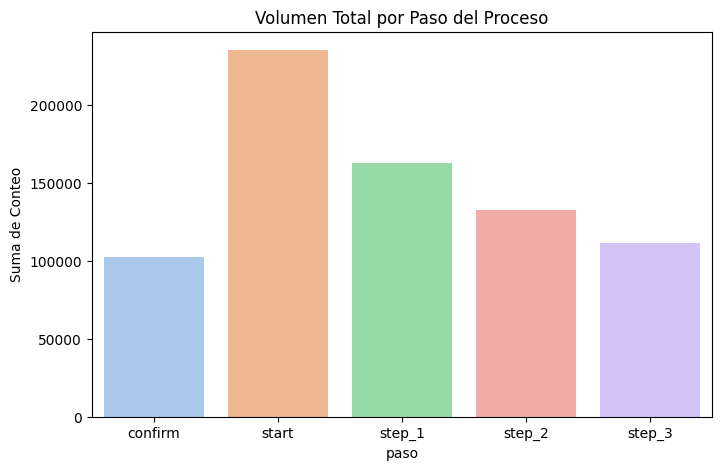

In [64]:
pasos_totales = grupo.groupby('paso')['conteo'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=pasos_totales, x='paso', y='conteo', palette='pastel')
plt.title('Volumen Total por Paso del Proceso')
plt.ylabel('Suma de Conteo')
plt.show()

In [65]:
resultado =f.categorico(df_huellas,"grupo_horario")

grupo_horario
Mañana(6-12)    283585
Tarde(12-18)    281181
Noche(18-24)    144937
Noche(0-6)       34938
Name: count, dtype: int64
['Tarde(12-18)', 'Mañana(6-12)', 'Noche(18-24)', 'Noche(0-6)']
Categories (4, object): ['Noche(0-6)' < 'Mañana(6-12)' < 'Tarde(12-18)' < 'Noche(18-24)']
4


In [66]:
## La mayoría de los pasos se realizan entre las 10 y las 12 de la mañana, aunque también hay un pico a las 18 horas. Esto puede indicar que los clientes prefieren realizar el proceso en línea durante la mañana.

# DF_FINAL

In [67]:
df_clientes = pd.merge(df_perfiles, df_experimentos, on='client_id', how='inner')

In [68]:
df_clientes

,client_id,años_fidelizacion,meses_fidelizacion,edad,genero,cantidad_cuentas,saldo_total_distribuido,llamadas_ultimos_6meses,log_in_ultimos_6meses,tipo
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70590,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70591,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70592,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70593,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [69]:
df_temporal = pd.merge(df_clientes, df_huellas, on='client_id', how='inner')

In [70]:
df_temporal

,client_id,años_fidelizacion,meses_fidelizacion,edad,genero,cantidad_cuentas,saldo_total_distribuido,llamadas_ultimos_6meses,log_in_ultimos_6meses,tipo,visitor_id,visit_id,paso,fecha_y_hora,fecha,hora,grupo_horario
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,2017-04-02,11:51:13,Mañana(6-12)
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,2017-04-02,11:47:50,Mañana(6-12)
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,2017-04-02,11:46:45,Mañana(6-12)
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,2017-04-02,11:23:08,Mañana(6-12)
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,2017-04-02,11:22:24,Mañana(6-12)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443779,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02,2017-04-05,11:48:02,Mañana(6-12)
443780,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,158544612_4105226940_43043,step_3,2017-04-05 11:44:07,2017-04-05,11:44:07,Mañana(6-12)
443781,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10,2017-04-05,11:43:10,Mañana(6-12)
443782,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,884309593_49820690623_654151,step_1,2017-04-05 11:41:32,2017-04-05,11:41:32,Mañana(6-12)


In [71]:
df_temporal.shape

(443784, 17)

In [72]:
df_temporal.isnull().sum()

client_id                       0
años_fidelizacion               0
meses_fidelizacion              0
edad                            0
genero                          0
cantidad_cuentas                0
saldo_total_distribuido         0
llamadas_ultimos_6meses         0
log_in_ultimos_6meses           0
tipo                       126649
visitor_id                      0
visit_id                        0
paso                            0
fecha_y_hora                    0
fecha                           0
hora                            0
grupo_horario                   0
dtype: int64

In [73]:
## Nos damos cuenta de que hay 126649 clientes que no pertenecen ni a un tipo ni a otro del experimento. Es decir, que perdemos un 28,54% de muestreo porque solo nos queremos quedar con aquellos clientes que sí sean parte de alguno de los dos grupos. 

In [74]:
df_final = df_temporal.dropna()

In [75]:
df_final.shape

(317135, 17)

# ANÁLISIS

In [76]:
## Agrupamos por test o control y por procesos, para contar cuantas veces se hicieron las etapas 
df_final.groupby('tipo')["paso"].value_counts()

tipo     paso   
Control  start      45366
         step_1     29535
         step_2     25766
         step_3     22497
         confirm    17330
Test     start      55753
         step_1     38651
         step_2     30888
         step_3     25755
         confirm    25594
Name: count, dtype: int64

In [77]:
## Ahora hacemos un conteo de los procesos realizados por cada cliente. 
df_final.groupby(['tipo',"paso"])["client_id"].nunique()

tipo     paso   
Control  confirm    15429
         start      23392
         step_1     20147
         step_2     18645
         step_3     17417
Test     confirm    18682
         start      26672
         step_1     24260
         step_2     22252
         step_3     20876
Name: client_id, dtype: int64

In [78]:
## Hacemos la tabla de contingencia para analizar las variables categóricas que son tipo y paso
clientes_proceso = pd.crosstab(df_final['tipo'], df_final['paso'])
clientes_proceso

paso,confirm,start,step_1,step_2,step_3
tipo,,,,,
Control,17330,45366,29535,25766,22497
Test,25594,55753,38651,30888,25755


In [79]:
## Ordenamos para que sea más claro
orden_logico = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_final['paso']= pd.Categorical(df_final['paso'], categories=orden_logico, ordered=True)

/var/folders/bk/hzstscb16rn4p883jsg8t31c0000gn/T/ipykernel_47002/2525353274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['paso']= pd.Categorical(df_final['paso'], categories=orden_logico, ordered=True)


In [80]:
clientes_proceso

paso,confirm,start,step_1,step_2,step_3
tipo,,,,,
Control,17330,45366,29535,25766,22497
Test,25594,55753,38651,30888,25755


<Axes: xlabel='tipo', ylabel='count'>

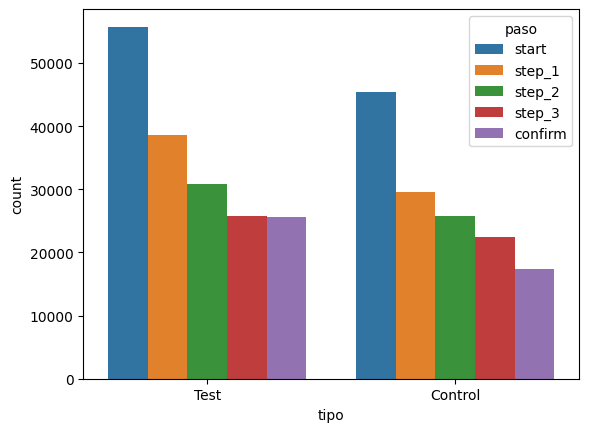

In [81]:
## Hacemos una visualización de gráfica de barras agrupadas para tener una visión más clara del conteo
sns.countplot(data=df_final, x='tipo', hue='paso')

<Axes: xlabel='paso', ylabel='tipo'>

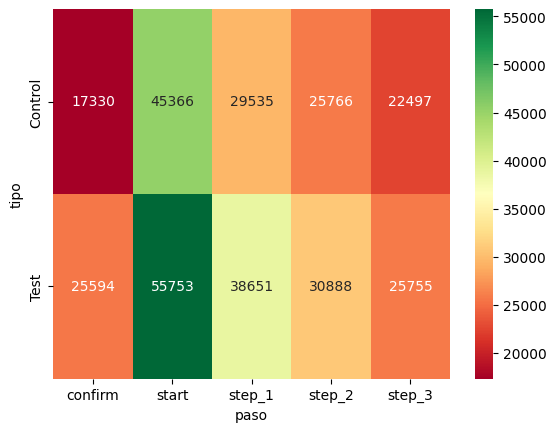

In [82]:
## Hacemos un heatmap para ver las correlaciones (si es que las hay) entre todas ambas variables y tener una visión más global. 
sns.heatmap(clientes_proceso, annot=True, cmap="RdYlGn", fmt="d")

### Tasa de finalización

In [148]:
df_final.columns

Index(['client_id', 'años_fidelizacion', 'meses_fidelizacion', 'edad',
       'genero', 'cantidad_cuentas', 'saldo_total_distribuido',
       'llamadas_ultimos_6meses', 'log_in_ultimos_6meses', 'tipo',
       'visitor_id', 'visit_id', 'paso', 'fecha_y_hora', 'fecha', 'hora',
       'grupo_horario', 'tiempo_visita', 'segundos_visita', 'confirmacion'],
      dtype='object')

### Tiempo dedicado a cada paso

In [83]:
## Quiero asegurar que la columna fecha y hora esté en formato date time
df_final['fecha_y_hora'] = pd.to_datetime(df_final['fecha_y_hora'])

/var/folders/bk/hzstscb16rn4p883jsg8t31c0000gn/T/ipykernel_47002/3353463889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['fecha_y_hora'] = pd.to_datetime(df_final['fecha_y_hora'])


In [84]:
## Quiero ordenar por usuario, el tiempo que ha pasado
df_final = df_final.sort_values(by=['visit_id', 'fecha_y_hora'])

In [85]:
## Agrupamos todas las filas que pertenecen a la misma visita y dentro de esa agrupación, coge la fila y resta la fila justo anterior (que se supone que es otra visita, aunque sea el mismo cliente) 
df_final['tiempo_visita'] = df_final.groupby('visit_id')['fecha_y_hora'].diff()

In [86]:
df_final

,client_id,años_fidelizacion,meses_fidelizacion,edad,genero,cantidad_cuentas,saldo_total_distribuido,llamadas_ultimos_6meses,log_in_ultimos_6meses,tipo,visitor_id,visit_id,paso,fecha_y_hora,fecha,hora,grupo_horario,tiempo_visita
300422,3561384,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26,13:22:17,Tarde(12-18),NaT
300421,3561384,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,2017-04-26,13:23:09,Tarde(12-18),0 days 00:00:52
76866,7338123,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,2017-04-09,16:20:56,Tarde(12-18),NaT
76865,7338123,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,2017-04-09,16:21:12,Tarde(12-18),0 days 00:00:16
76864,7338123,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,Test,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,2017-04-09,16:21:21,Tarde(12-18),0 days 00:00:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196202,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,2017-04-21,23:49:11,Noche(18-24),NaT
196201,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,2017-04-21,23:49:22,Noche(18-24),0 days 00:00:11
196200,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,2017-04-21,23:50:16,Noche(18-24),0 days 00:00:54
196199,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,2017-04-21,23:51:00,Noche(18-24),0 days 00:00:44


In [87]:
## Como realmente no podemos calcularlos por días, sino por segundos, buscamos pasarlos a segundos. 

In [88]:
df_final['segundos_visita'] = df_final['tiempo_visita'].dt.total_seconds()

In [89]:
df_final

,client_id,años_fidelizacion,meses_fidelizacion,edad,genero,cantidad_cuentas,saldo_total_distribuido,llamadas_ultimos_6meses,log_in_ultimos_6meses,tipo,visitor_id,visit_id,paso,fecha_y_hora,fecha,hora,grupo_horario,tiempo_visita,segundos_visita
300422,3561384,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26,13:22:17,Tarde(12-18),NaT,NaN
300421,3561384,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,2017-04-26,13:23:09,Tarde(12-18),0 days 00:00:52,52.0
76866,7338123,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,2017-04-09,16:20:56,Tarde(12-18),NaT,NaN
76865,7338123,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,2017-04-09,16:21:12,Tarde(12-18),0 days 00:00:16,16.0
76864,7338123,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,Test,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,2017-04-09,16:21:21,Tarde(12-18),0 days 00:00:09,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196202,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,2017-04-21,23:49:11,Noche(18-24),NaT,NaN
196201,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,2017-04-21,23:49:22,Noche(18-24),0 days 00:00:11,11.0
196200,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,2017-04-21,23:50:16,Noche(18-24),0 days 00:00:54,54.0
196199,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,2017-04-21,23:51:00,Noche(18-24),0 days 00:00:44,44.0


In [90]:
## Comprobamos los nulos, como hay muchos nulos
df_final['segundos_visita'].isnull().sum()

np.int64(69185)

In [91]:
## Decidimos imputar valores de 0 porque que no haya diferencia es que no ha habido visita útil
df_final['segundos_visita'] = df_final['segundos_visita'].fillna(0)

In [99]:
duracion_total_pasos = df_final.groupby('paso')['segundos_visita'].agg(['sum', 'mean']).round(2)

/var/folders/bk/hzstscb16rn4p883jsg8t31c0000gn/T/ipykernel_47002/1324079921.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duracion_total_pasos = df_final.groupby('paso')['segundos_visita'].agg(['sum', 'mean']).round(2)


In [100]:
duracion_total_pasos

,sum,mean
paso,,
start,6075398.0,60.08
step_1,2711761.0,39.77
step_2,2479318.0,43.76
step_3,4583437.0,94.99
confirm,5031860.0,117.23


In [98]:
## El paso 1 (unos 40 segundos) y el dos (unos 43 segundos) son los más rápidos, mientras que en el paso 3 la media es más del doble (un minuto y medio) y ya en la confirmación hay casi 3 minutos de espera, quizá porque haya una revisión del resto de pasos. 

/var/folders/bk/hzstscb16rn4p883jsg8t31c0000gn/T/ipykernel_47002/2688485706.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=duracion_total_pasos.index, y='mean', data=duracion_total_pasos, palette='viridis')


Text(0, 0.5, 'Segundos (Media)')

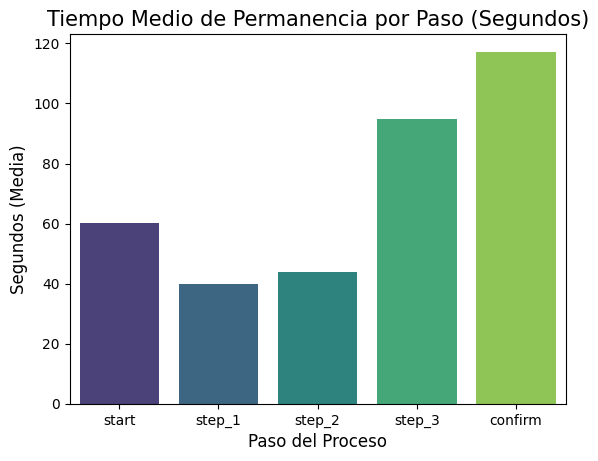

In [103]:
ax = sns.barplot(x=duracion_total_pasos.index, y='mean', data=duracion_total_pasos, palette='viridis')
plt.title('Tiempo Medio de Permanencia por Paso (Segundos)', fontsize=15)
plt.xlabel('Paso del Proceso', fontsize=12)
plt.ylabel('Segundos (Media)', fontsize=12)

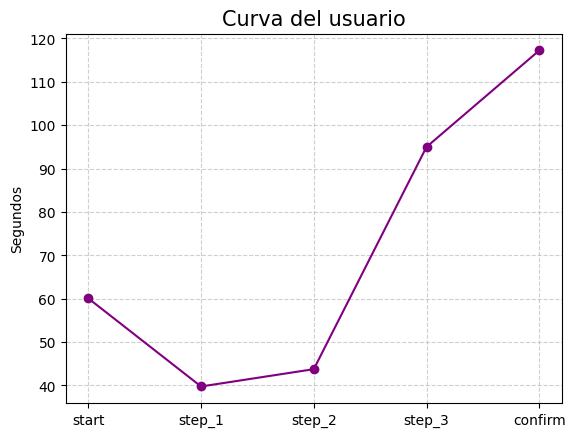

In [117]:
plt.plot(duracion_total_pasos.index, duracion_total_pasos['mean'], marker='o', linestyle='-', color='purple')
plt.title('Curva del usuario', fontsize=15)
plt.ylabel('Segundos')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Tasas de error

### Tasa de éxito por edad

In [121]:
## Asumimos que el éxito del proceso es el conjunto de todos los usuarios que han confirmado el proceso.

In [123]:
## Es decir, de esos 17330 (control) y 25594 (test) (total: 42924), ¿qué edad tienen? 
clientes_proceso

paso,confirm,start,step_1,step_2,step_3
tipo,,,,,
Control,17330,45366,29535,25766,22497
Test,25594,55753,38651,30888,25755


In [130]:
## La tasa sería entonces la cantidad de usuarios que confirmaron, entre el total de todos los usuarios que iniciaron x 100 (para porcentaje)
df_final['confirmacion'] = (df_final['paso'] == 'confirm')
df_final['confirmacion']

300422     True
300421     True
76866     False
76865     False
76864     False
          ...  
196202    False
196201    False
196200    False
196199    False
196198    False
Name: confirmacion, Length: 317135, dtype: bool

In [136]:
df_final['confirmacion'].value_counts()

confirmacion
False    274211
True      42924
Name: count, dtype: int64

In [152]:
df_final_edad = f.rango_edad(df_final, 'edad')

In [153]:
df_final_edad

,client_id,años_fidelizacion,meses_fidelizacion,edad,genero,cantidad_cuentas,saldo_total_distribuido,llamadas_ultimos_6meses,log_in_ultimos_6meses,tipo,...,visit_id,paso,fecha_y_hora,fecha,hora,grupo_horario,tiempo_visita,segundos_visita,confirmacion,grupo_edad
300422,3561384,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,Test,...,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26,13:22:17,Tarde(12-18),NaT,0.0,True,Adultos maduros(51-65)
300421,3561384,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,Test,...,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,2017-04-26,13:23:09,Tarde(12-18),0 days 00:00:52,52.0,True,Adultos maduros(51-65)
76866,7338123,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,Test,...,100019538_17884295066_43909,start,2017-04-09 16:20:56,2017-04-09,16:20:56,Tarde(12-18),NaT,0.0,False,Jóvenes(19-35)
76865,7338123,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,Test,...,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,2017-04-09,16:21:12,Tarde(12-18),0 days 00:00:16,16.0,False,Jóvenes(19-35)
76864,7338123,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,Test,...,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,2017-04-09,16:21:21,Tarde(12-18),0 days 00:00:09,9.0,False,Jóvenes(19-35)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196202,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,...,999988789_76411676596_272843,start,2017-04-21 23:49:11,2017-04-21,23:49:11,Noche(18-24),NaT,0.0,False,Adultos maduros(51-65)
196201,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,...,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,2017-04-21,23:49:22,Noche(18-24),0 days 00:00:11,11.0,False,Adultos maduros(51-65)
196200,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,...,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,2017-04-21,23:50:16,Noche(18-24),0 days 00:00:54,54.0,False,Adultos maduros(51-65)
196199,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,Test,...,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,2017-04-21,23:51:00,Noche(18-24),0 days 00:00:44,44.0,False,Adultos maduros(51-65)


In [156]:
tasa_exito = df_final_edad.groupby('grupo_edad')['confirmacion']

/var/folders/bk/hzstscb16rn4p883jsg8t31c0000gn/T/ipykernel_47002/2213165048.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_exito = df_final_edad.groupby('grupo_edad')['confirmacion']


In [158]:
tasa_exito.value_counts()

grupo_edad              confirmacion
Niños(0-18)             False             635
                        True              109
Jóvenes(19-35)          False           69985
                        True            11459
Adultos(36-50)          False           66520
                        True            10864
Adultos maduros(51-65)  False           94361
                        True            14166
Adultos mayores(66+)    False           42710
                        True             6326
Name: count, dtype: int64

In [159]:
## Agrupamos por edad y calculamos la media de los valores True
tasa_por_edad = df_final_edad.groupby('grupo_edad')['confirmacion'].mean() * 100

/var/folders/bk/hzstscb16rn4p883jsg8t31c0000gn/T/ipykernel_47002/770117500.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_por_edad = df_final_edad.groupby('grupo_edad')['confirmacion'].mean() * 100


In [176]:
df_tasa = tasa_por_edad.reset_index()
df_tasa.columns = ['grupo_edad', 'porcentaje_confirmacion']

In [177]:
df_tasa

,grupo_edad,porcentaje_confirmacion
0,Niños(0-18),14.650538
1,Jóvenes(19-35),14.069790
2,Adultos(36-50),14.039078
3,Adultos maduros(51-65),13.052973
4,Adultos mayores(66+),12.900726


/var/folders/bk/hzstscb16rn4p883jsg8t31c0000gn/T/ipykernel_47002/3950623530.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_tasa, x='grupo_edad', y='porcentaje_confirmacion', palette='viridis')


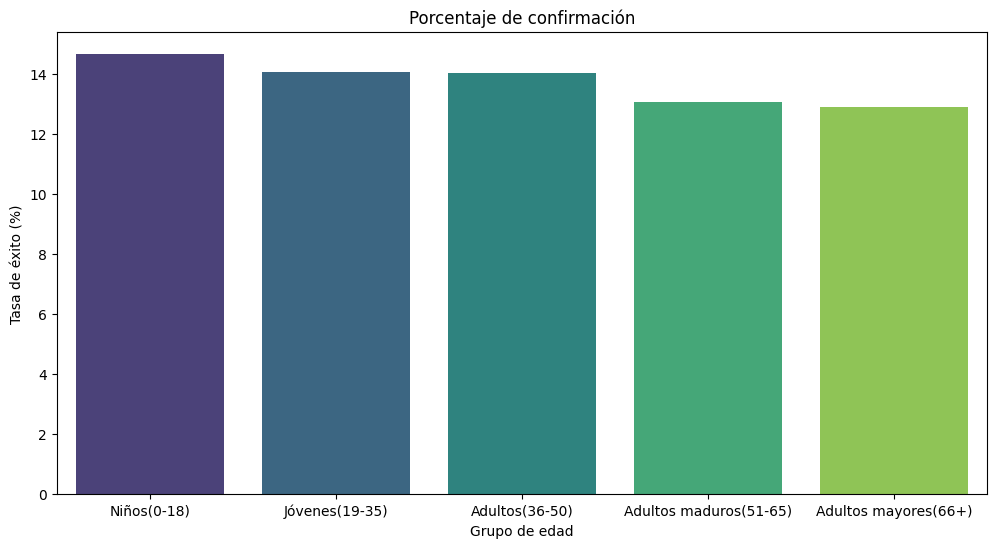

In [180]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_tasa, x='grupo_edad', y='porcentaje_confirmacion', palette='viridis')
plt.title('Porcentaje de confirmación')
plt.ylabel('Tasa de éxito (%)')
plt.xlabel('Grupo de edad')
plt.show()

#### Según los KPI elegidos, ¿cómo se compara el rendimiento del nuevo diseño con el anterior?
